
Se sabe que un sistema físico es gobernado por las ecuaciones,



$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-1z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.<br> 
a) Diagonalize $A$.<br> 

b) Use el hecho de que $f(A) = U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.<br>.
c) Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.<br> 
d) Compare el resultado a la solución analítica,

$$
\begin{align}
2x & = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})), \\
2y & = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})), \\
2z & = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
\end{align}
$$

 $\mathbf{r}'=A\mathbf{r}$


 $f(A) =U f(D) U^{-1}$


 $e^{At} = U e^{Dt} U ^{-1}$

In [306]:
import numpy as np
import scipy.linalg as la
# Creacion de la Matriz A
x1 = np.array([2, -1, 1])
x2 = np.array([0, 3, -1])
x3 = np.array([2, 1, +3]) 

A = np.asmatrix([x1,x2,x3])

In [307]:
# Obtencion de los Autovalores y Vectores propios de la matriz
E, U = la.eig(A) 
D = np.diag(E)
U = np.asmatrix(U)
r0=np.array([1,1,2])
# Funcion e^(A*t) aplicada a los autovalores * t
def f(t):
  return np.diag(np.exp(E*t))
# Funcion que calcula los valores [x,y,z] para un cierto t 
def r(t):
  Diag = f(t)
  return (U @ Diag @ U.I) @r0

In [308]:
times = np.linspace(0,2,101)
x = np.zeros(101)
y = np.zeros(101)
z = np.zeros(101)
#Creacion de los valores de x, y, z usando el resultado matricial
for i,t in enumerate(times):
  x[i] = np.real(np.array(r(t))[0][0])
  y[i] = np.real(np.array(r(t))[0][1])
  z[i] = np.real(np.array(r(t))[0][2])

In [309]:
# Creacion de los valores reales ( teoricos ) para la solucion del sistema
xp_2 = np.exp(2*times)
x_real = (exp_2*(1+exp_2-2*times)-2*times*exp_2+2*exp_2*(-1+exp_2))/2
y_real = (-exp_2*(-1+exp_2-2*times)+2*exp_2*(1+times)-2*exp_2*(-1+exp_2))/2
z_real = (exp_2*(-1+exp_2+2*times)+2*exp_2*(times)+2*exp_2*(1+exp_2))/2

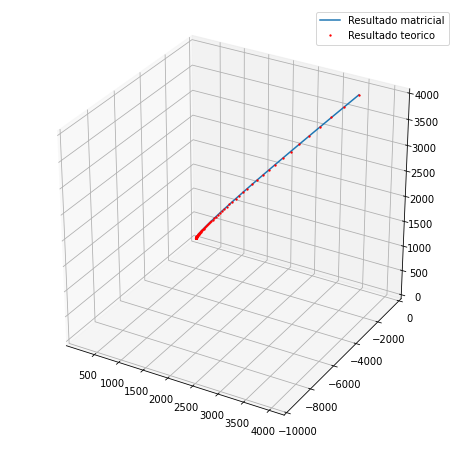

In [314]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
# Graficacion de los valores reales y obtenidos con la matriz para comparar
plt.plot(x,y,z, label ="Resultado matricial")
plt.plot(x_real,y_real,z_real,"ro", markersize=1.3, label = "Resultado teorico")
#Ajuste de la grafica
ax.set_xlim(0.9,4200)
ax.set_ylim(-10000,1.1)
ax.set_zlim(0,4000)
plt.legend()


2. Un proceso para encriptar un mensaje secreto es usar cierta matrix cuadrada cuyos elementos son enteros con elementos enteros en la inversa. Se recibe un mensaje, se asigna un número a cada letra Por ejemplo, A=1, B=2, C=3, ... etc y espacio=27), se arreglan los números en una matriz de izquierda a derecha en cada fila, donde el número de elementos en la fila es igual al tamano de la matriz de codigo, se multiplica esa matriz por la matriz de código por la derecha, se transcribe el mensaje en una cadena de números y se manda el mensaje. 

La persona que debe recibir el mensaje conoce la matriz de codigo. El o ellla arrelgan el mensaje encriptado en una matriz de izquierda a derecha en cada fila, en donde el numero de elementos en una fila conicide con el tamano de la matriz de codigo muplicada por la derecha, por el inverso de la matriz de código y puede leer mensaje decodificado.

Usted a recibido el siguiente mensaje que fue encriptado usando la matriz A. Decodifiquelo.

```
A = matrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])
```

Mensaje

47,49,-19,257,487,10,-9,63,137,236, 79,142,-184,372,536,59,70,-40,332,588, 

la primera fila del mensaje es 47,49,-19,257,487

¿Cual es el mensaje?



In [311]:
A = np.matrix([[ 1,  2, -3,  4,  5],
               [-2, -5,  8, -8, -9],
               [ 1,  2, -2,  7,  9],
               [ 1,  1,  0,  6, 12],
               [ 2,  4, -6,  8, 11]])

abc=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',' ']
num=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27']

# Creacion de diccionario usando como clave los numeros y como valor las letras
dic = dict(zip(num,abc))
# El codigo
Code = np.matrix([[47,49,-19,257,487]
                  ,[10,-9,63,137,236],
                  [79,142,-184,372,536],
                  [59,70,-40,332,588]])

inv_A = A.I
# Se multiplica la matriz por la inversa por derecha 
message = (Code@inv_A).round()
#Se vuelve un array y se vuelven los valores enteros para poder usar el diccionario
message = np.array(message).astype(int)
# Union del array y obtencion del mensaje
final_message = "".join([dic[str(i)] for i in message.flatten()])
print(final_message)

ARE YOU HAVING FUN  


In [312]:
# Respuesta al mensaje
response = np.matrix([[55,93,-97,307,470],
                      [48,64,-63,231,389]])



```
abc=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',' ']
num=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27']
```


3. Construir un programa que permita realizar la multiplicacion de dos matrices. El programa debe establecer si las matrices se pueden multiplicar.


In [313]:
def prod(matrix1, matrix2):
  # Se vuelven los dos arreglos una matrix con el fin de tener su shape en la forma (n,m)
  A = np.matrix(matrix1) # De tamaño m x n 
  B = np.matrix(matrix2) # De tamaño q x p
  # Si son compatibles para la multiplicacion realizar el producto (n = q)
  if ( A.shape[1] == B.shape[0]):
    # Crear un array de (m x p)
    new = np.zeros((A.shape[0],B.shape[1]))
    for i in range(0,A.shape[0]):
      for j in range(0,B.shape[1]):
        # Se asigna a i,j la sumatoria de los valores de la fila i de A por la 
        # Columna j de B, o lo que es similar, el producto punto de la fila A por
        # La columna B
        new[i,j] = np.dot(A[i,:],B[:,j])
    return new
  # Si no son compatibles, arrojar un error
  else:
    raise Exception("Matrices no compatibles para multiplicación")

A = np.array([[1,2,3],[4,5,6],[7,8,9]])
B = np.array([[2,6,7],[1,7,8],[3,4,2]])
print(prod(A,B))

# C = np.array([[1,2],[4,5],[7,8]])
# D = np.array([[2,6,7],[1,7,8],[3,4,2]])
# print(prod(C,D))

[[ 13.  32.  29.]
 [ 31.  83.  80.]
 [ 49. 134. 131.]]
